### Import modules & installations & data

In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import re, catboost
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from tqdm import tqdm

pd.set_option('display.max_columns', 100)

In [120]:
df = (
    pd.read_excel(
        'train.xlsx'
    )
    .drop(columns='Unnamed: 0')
#     .set_index('№ брони')
)
display(df.head(5))
display(df.tail(5))
df.shape

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1


,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3
26173,20220816-6634-155783156,1,24600.0,24600,Банк. карта: Банк Россия (банк. карта),2022-08-13 22:35:43,NaT,2022-08-16 15:00:00,1,2022-08-17 12:00:00,Официальный сайт,Активный,Апартаменты с 2 спальнями с отдельным входом,3,1


(26174, 15)

In [121]:
# добавим нормально таргет
df['target'] = np.where(df['Дата отмены'].isna(), 0, 1)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64     

### Deep dive into data

In [123]:
# точно ли уникальна бронь
assert df['№ брони'].nunique() == df.shape[0]

#### Номера

In [124]:
display(df['Номеров'].unique())
df['Номеров'].value_counts()

array([1, 2, 3, 4, 5, 6], dtype=int64)

Номеров
1    24188
2     1747
3      172
4       39
5       26
6        2
Name: count, dtype: int64

#### Стоимость

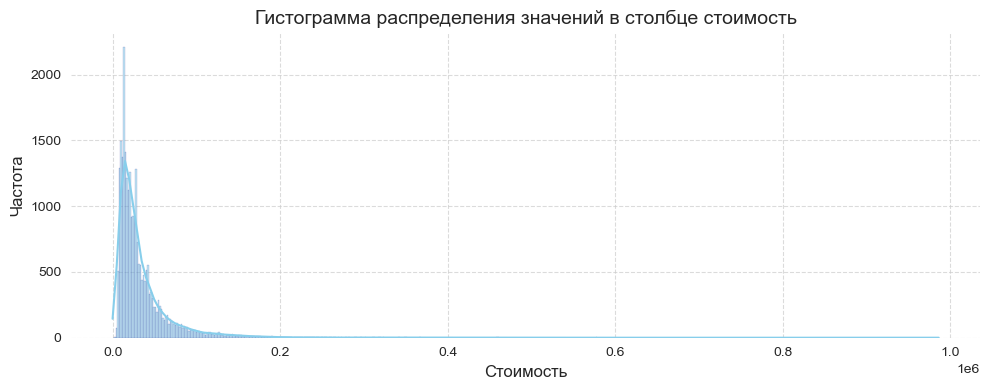

------------------


'min_value=1.0'

'max_value=986400.0'

'mean_value=35099.78'

'median_value=23800.0'

In [125]:
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(10, 4))
price_plot = sns.histplot(data=df, x="Стоимость", kde=True, color="skyblue", edgecolor="navy")

plt.title("Гистограмма распределения значений в столбце стоимость", fontsize=14)
plt.xlabel("Стоимость", fontsize=12)
plt.ylabel("Частота", fontsize=12)

plt.tick_params(axis="both", which="major", labelsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

min_value = df['Стоимость'].min()
max_value = df['Стоимость'].max()
mean_value = df['Стоимость'].mean()
median_value = df['Стоимость'].median()
print('------------------')
display(f'{min_value=}')
display(f'{max_value=}')
display(f'{mean_value=:.2f}')
display(f'{median_value=}')

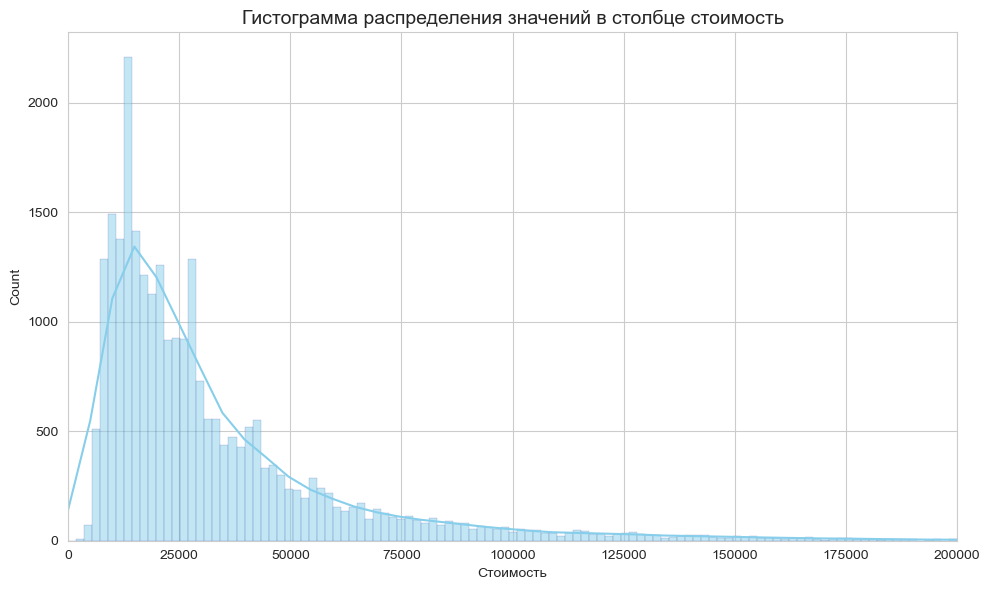

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x="Стоимость", kde=True, color="skyblue", edgecolor="navy")

ax.set_xlim(0, 200000)

plt.title("Гистограмма распределения значений в столбце стоимость", fontsize=14)
plt.tight_layout()
plt.show()

#### Внесена предоплата

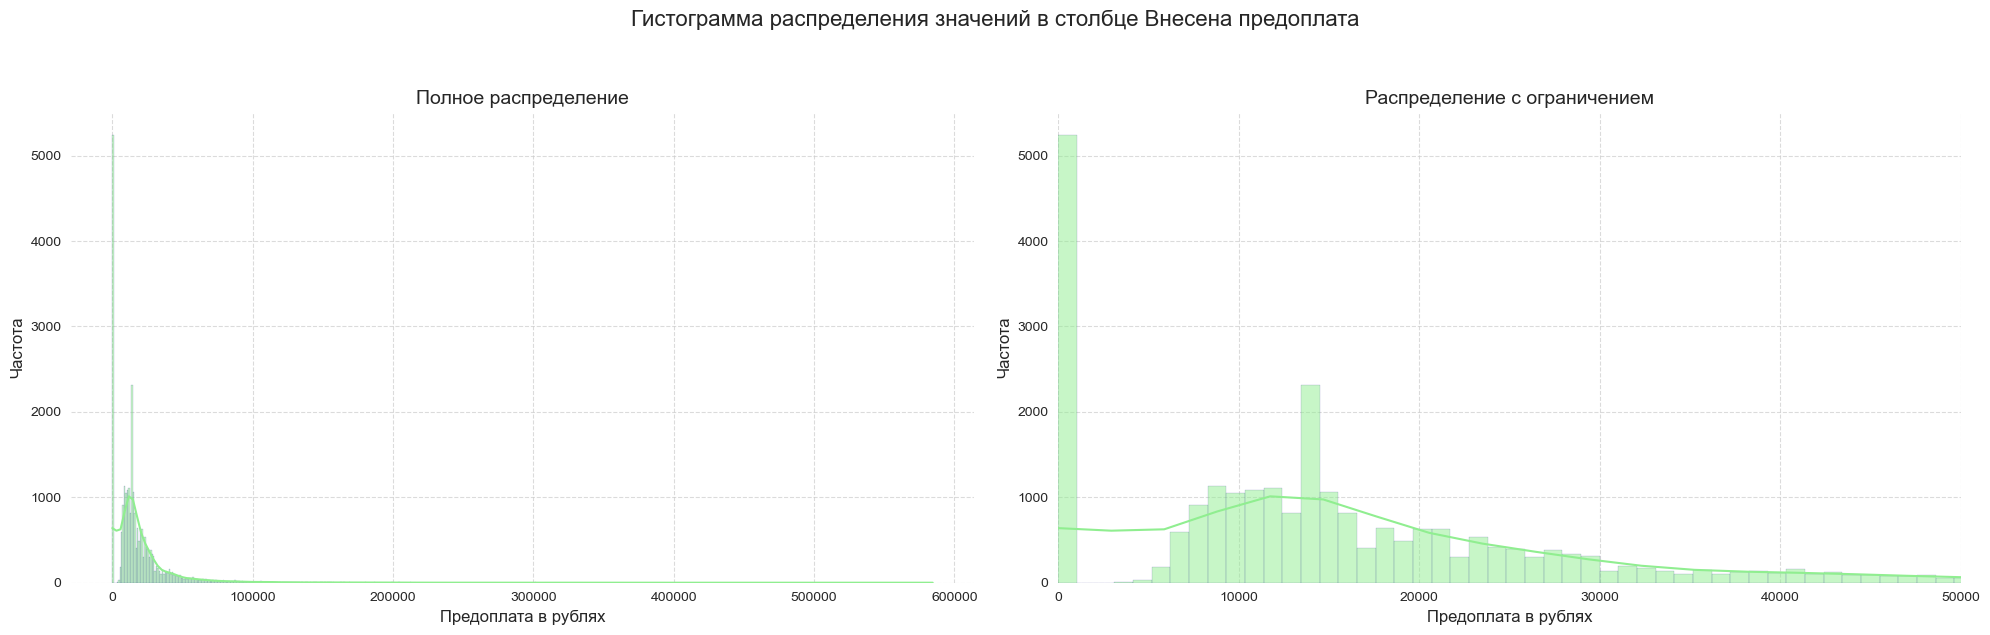

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Первый график (полный)
sns.histplot(
    data=df,
    x="Внесена предоплата",
    kde=True,
    color="lightgreen",
    edgecolor="navy",
    ax=ax1,
)
ax1.set_title("Полное распределение", fontsize=14)
ax1.set_xlabel("Предоплата в рублях", fontsize=12)
ax1.set_ylabel("Частота", fontsize=12)
ax1.tick_params(axis="both", which="major", labelsize=10)
ax1.grid(True, linestyle="--", alpha=0.7)
sns.despine(ax=ax1, left=True, bottom=True)

# Второй график (с ограничением по X)
sns.histplot(
    data=df,
    x="Внесена предоплата",
    kde=True,
    color="lightgreen",
    edgecolor="navy",
    ax=ax2,
)
ax2.set_title("Распределение с ограничением", fontsize=14)
ax2.set_xlabel("Предоплата в рублях", fontsize=12)
ax2.set_ylabel("Частота", fontsize=12)
ax2.tick_params(axis="both", which="major", labelsize=10)
ax2.grid(True, linestyle="--", alpha=0.7)
sns.despine(ax=ax2, left=True, bottom=True)

x_min, x_max = 0, 50000
ax2.set_xlim(x_min, x_max)

fig.suptitle(
    "Гистограмма распределения значений в столбце Внесена предоплата",
    fontsize=16,
    y=1.05,
)

plt.tight_layout()
plt.show()

#### Способ оплаты

In [128]:
display(df['Способ оплаты'].unique())
df['Способ оплаты'].value_counts()

array(['Внешняя система оплаты',
       'Отложенная электронная оплата: Банк Россия (банк. карта)',
       'Банк. карта: Банк Россия (банк. карта)',
       'Внешняя система оплаты (С предоплатой)',
       'Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)',
       'Гарантия банковской картой',
       'Внешняя система оплаты (Оплата наличными)',
       'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
       'При заселении',
       'Банк. карта: Эквайринг ComfortBooking (Банк. карта)',
       'Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)',
       'Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)',
       'Внешняя система оплаты (Банковская карта)',
       'Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)'],
      dtype=object)

Способ оплаты
Банк. карта: Банк Россия (банк. карта)                                           13747
Отложенная электронная оплата: Банк Россия (банк. карта)                          4128
Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)     2539
Внешняя система оплаты (С предоплатой)                                            1875
Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)                 1614
Гарантия банковской картой                                                         876
При заселении                                                                      704
Внешняя система оплаты                                                             332
Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)                  170
Внешняя система оплаты (Оплата наличными)                                           69
Банк. карта: Эквайринг ComfortBooking (Банк. карта)                                 58
Внешняя система оплаты (Банко

#### Дата бронирования

In [129]:
# итого имеем данные за 2 года
df['Дата бронирования'].describe()

count                            26174
mean     2022-12-21 12:59:53.618208512
min                2022-01-01 03:42:03
25%         2022-05-29 04:59:47.500000
50%                2022-12-23 21:26:00
75%      2023-07-11 20:50:03.249999872
max                2023-12-31 20:53:36
Name: Дата бронирования, dtype: object

In [130]:
df.head(1)

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница,target
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,0


In [131]:
df['booking_date_dd_mm_yy'] = pd.to_datetime(df['Дата бронирования']).dt.strftime('%d-%m-%y')
display(df['booking_date_dd_mm_yy'].value_counts().head(7))

booking_date_dd_mm_yy
01-03-23    120
15-04-22    116
06-04-22     99
02-04-22     99
16-03-22     96
07-04-22     92
14-04-22     79
Name: count, dtype: int64

In [132]:
df['booking_date_day'] = df['Дата бронирования'].dt.day # пусть будет
df['booking_date_month'] = df['Дата бронирования'].dt.month

In [133]:
num_to_month_mapper = {
    1: 'Jan', 2: 'Feb', 3: 'March',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df['booking_date_month_name'] = df['booking_date_month'].map(num_to_month_mapper)

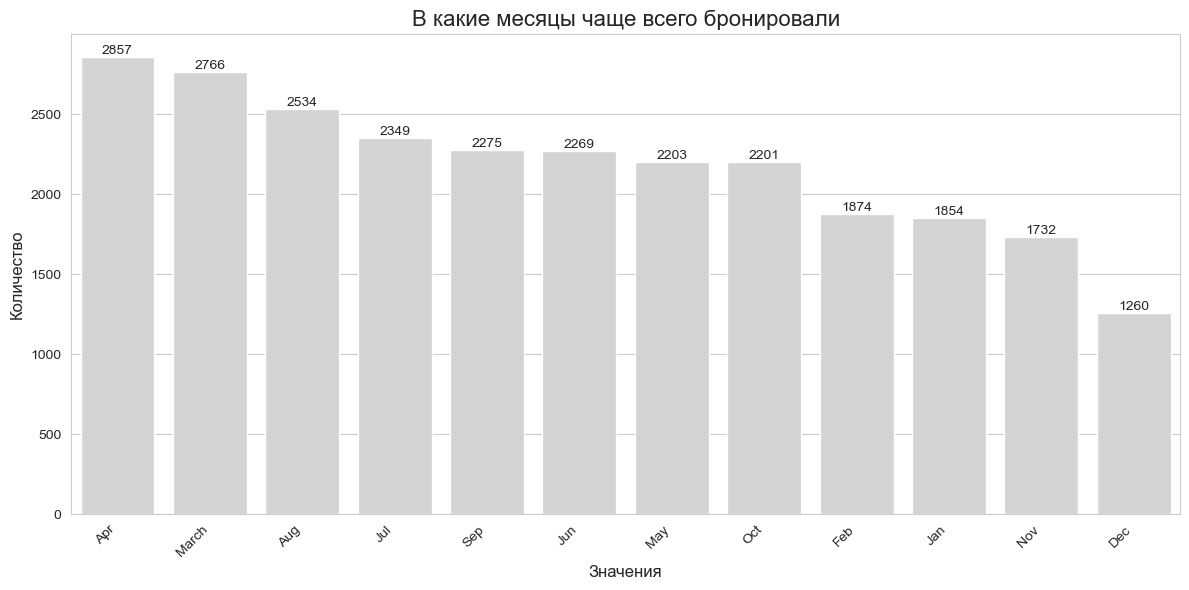

In [134]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.countplot(
    x=df["booking_date_month_name"], order=df["booking_date_month_name"].value_counts().index,
    color = 'lightgrey'
)

plt.title("В какие месяцы чаще всего бронировали", fontsize=16)
plt.xlabel("Значения", fontsize=12)
plt.ylabel("Количество", fontsize=12)

plt.xticks(rotation=45, ha="right")

for i, v in enumerate(df["booking_date_month_name"].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### Дата отмены (а вернее факт отмены, наш таргет)

In [135]:
df['target'].value_counts()

target
1    20982
0     5192
Name: count, dtype: int64

#### Заезд

In [136]:
(df['Заезд'] - df['Дата бронирования'])

0        7 days 18:22:30
1       23 days 00:42:58
2       19 days 16:00:30
3        9 days 23:04:07
4        8 days 19:05:47
              ...       
26169   61 days 21:14:42
26170    4 days 21:05:43
26171   46 days 19:35:55
26172   67 days 05:04:10
26173    2 days 16:24:17
Length: 26174, dtype: timedelta64[ns]

In [137]:
df['check_in_delta_booked'] = (df['Заезд'] - df['Дата бронирования']).dt.days

In [150]:
df['Заезд'].dt.month.value_counts()

Заезд
8     3071
7     2998
9     2503
6     2442
5     2225
2     2216
10    2202
1     1801
3     1767
4     1735
11    1614
12    1600
Name: count, dtype: int64

#### Кол-во ночей

Идея, что чем больше ночей, тем тяжелее отменить (значит уже заранее прям запланировано, отпуск, доп. туры и экскурсии и тд), но чисто по геометрической вероятности выше шанс что выпадет форс-мажор на дни поездки, в общем тяжело влияние оценить

In [138]:
df['Ночей'].value_counts()

Ночей
1     10245
2      8712
3      3805
4      1778
5       758
6       445
7       230
8        70
10       47
9        33
13       13
11       10
14       10
12        8
16        2
20        2
31        1
15        1
26        1
18        1
17        1
21        1
Name: count, dtype: int64

#### Выезд 

In [139]:
#TODO

#### Источник

In [140]:
df['Источник'].unique()

array(['Яндекс.Путешествия', 'Официальный сайт', 'Bronevik.com(new)',
       'booking.com', 'Бронирование из экстранета', 'Zabroniryi.ru',
       'OneTwoTrip', 'ostrovok.ru', 'Программа лояльности', 'Cuva',
       'booking.com (Booking.com)', 'Acase.ru (ООО "АКАДЕМ-ОНЛАЙН")',
       'Acase.ru (ООО "ПРАНДИУМ")', 'Alean.ru (13.10.2023-02.06.2025)',
       'Alean.ru (03.02.2022-31.01.2023)', '101hotels.com',
       'Acase.ru (ООО "КАЛЕЙДОСКОП")', 'Alean.ru (16.01.2023-06.09.2024)',
       'Bronevik.com/Bro.Online', 'Тинькофф Путешествия', 'ВКонтакте',
       'Otello', 'expedia.com (A-Hotels.com)', 'Ozon',
       'Alean.ru (31.10.2023-22.06.2025)', 'Svoy Hotel',
       'Alean.ru (20.01.2021-31.01.2022)'], dtype=object)

#### Статус брони

In [141]:
df['Статус брони'].unique()

array(['Отмена', 'Активный', 'Неподтвержденные', 'Освоб. заранее',
       'Ожидается оплата'], dtype=object)

Вот это очень забавный столбец

In [118]:
test = (
    pd.read_excel("test.xlsx").drop(columns="Unnamed: 0")
)

In [143]:
test.columns # в тесте его нет, а значит он нам и не нужен в принципе

Index(['№ брони', 'Номеров', 'Стоимость', 'Внесена предоплата',
       'Способ оплаты', 'Дата бронирования', 'Заезд', 'Ночей', 'Выезд',
       'Источник', 'Категория номера', 'Гостей', 'Гостиница'],
      dtype='object')

In [144]:
df['Категория номера'].unique()

array(['Номер «Стандарт»', 'Номер «Студия»', 'Номер «Люкс»',
       'Апартаменты с 2 спальнями с отдельным входом',
       'Коттедж с 3 спальнями',
       '1. Апартаменты с 2 спальнями с отдельным входом\n2. Апартаменты с 2 спальнями с отдельным входом',
       '1. Коттедж с 3 спальнями\n2. Коттедж с 3 спальнями',
       'Коттедж с 2 спальнями',
       '1. Номер «Стандарт»\n2. Номер «Стандарт»',
       '1. Номер «Стандарт»\n2. Номер «Стандарт»\n3. Номер «Стандарт»',
       'Номер «Стандарт» для маломобильных групп населения',
       '1. Номер «Люкс»\n2. Номер «Люкс»',
       '1. Номер «Стандарт»\n2. Номер «Люкс»',
       '1. Коттедж с 2 спальнями\n2. Коттедж с 2 спальнями\n3. Коттедж с 2 спальнями',
       '1. Коттедж с 2 спальнями\n2. Коттедж с 2 спальнями',
       '1. Номер «Стандарт»\n2. Номер «Стандарт»\n3. Номер «Стандарт»\n4. Номер «Стандарт» для маломобильных групп населения',
       '1. Коттедж с 3 спальнями\n2. Коттедж с 3 спальнями\n3. Коттедж с 3 спальнями',
       '1. Котте

---

In [147]:
df['Гостей'].value_counts()

Гостей
2     15115
3      4680
4      3154
1      1612
5       812
6       444
7       161
8       118
10       34
9        26
12        6
11        4
14        3
13        3
15        1
16        1
Name: count, dtype: int64

16 человек это конечно сильно. В целом это даже может объяснить вот строчки по типу:

`1. Коттедж с 2 спальнями\n2. Коттедж с 2 спальнями\n3. Коттедж с 2 спальнями`

In [149]:
# проверяем гипотезу
df[df['Гостей'] == 16]['Категория номера']

14639    1. Коттедж с 3 спальнями\n2. Коттедж с 3 спаль...
Name: Категория номера, dtype: object

Genius... Попал в десятку...

--------

### More of feature generation

In [152]:
from workalendar.europe import Russia
calendar_rus = Russia()

In [162]:
# флаг выходной / нет
tqdm.pandas()
df['check_in_is_holiday'] = df['Заезд'].progress_apply(lambda x: 0 if calendar_rus.is_working_day(x) else 1)
df.head(3)

100%|██████████| 26174/26174 [00:00<00:00, 212627.93it/s]


,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница,target,booking_date_dd_mm_yy,booking_date_day,booking_date_month,booking_date_month_name,check_in_delta_booked,check_in_is_holiday
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,0,20-04-23,20,4,Apr,7,0
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1,1,18-06-22,18,6,Jun,23,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4,1,14-11-22,14,11,Nov,19,1


In [163]:
def calendar_features(data):
    data_ = data.copy(deep=True)
    # праздник / рабочий день (заезд)
    tqdm.pandas()
    data_['check_in_is_holiday'] = (
        data_['Заезд'].progress_apply(lambda x: 0 if calendar_rus.is_working_day(x) else 1)
    )
    # праздник / рабочий день (бронь)
    data_['booking_date_is_holiday'] = (
        data_['Дата бронирования'].progress_apply(lambda x: 0 if calendar_rus.is_working_day(x) else 1)
    )
    # праздник / рабочий день (бронь)
    data_['check_out_is_holiday'] = (
        data_['Выезд'].progress_apply(lambda x: 0 if calendar_rus.is_working_day(x) else 1)
    )
    # день недели (бронь + заезд + выезд)
    data_['check_in_weekday'] = data_['Заезд'].dt.weekday
    data_['booking_date_weekday'] = data_['Дата бронирования'].dt.weekday
    data_['check_out_weekday'] = data_['Выезд'].dt.weekday
    
    print(f"in {data.shape[1]} >>> processing... >>> out {data_.shape[1]}")

    return data_

---

In [ ]:
# слабые фичи, надо как-то усилить
'Способ оплаты'
'Номеров'
'Источник'
'Категория номера'

In [167]:
df['Способ оплаты'].unique()

array(['Внешняя система оплаты',
       'Отложенная электронная оплата: Банк Россия (банк. карта)',
       'Банк. карта: Банк Россия (банк. карта)',
       'Внешняя система оплаты (С предоплатой)',
       'Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)',
       'Гарантия банковской картой',
       'Внешняя система оплаты (Оплата наличными)',
       'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
       'При заселении',
       'Банк. карта: Эквайринг ComfortBooking (Банк. карта)',
       'Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)',
       'Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)',
       'Внешняя система оплаты (Банковская карта)',
       'Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)'],
      dtype=object)

In [168]:
df['Номеров'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [169]:
df['Источник'].unique()

array(['Яндекс.Путешествия', 'Официальный сайт', 'Bronevik.com(new)',
       'booking.com', 'Бронирование из экстранета', 'Zabroniryi.ru',
       'OneTwoTrip', 'ostrovok.ru', 'Программа лояльности', 'Cuva',
       'booking.com (Booking.com)', 'Acase.ru (ООО "АКАДЕМ-ОНЛАЙН")',
       'Acase.ru (ООО "ПРАНДИУМ")', 'Alean.ru (13.10.2023-02.06.2025)',
       'Alean.ru (03.02.2022-31.01.2023)', '101hotels.com',
       'Acase.ru (ООО "КАЛЕЙДОСКОП")', 'Alean.ru (16.01.2023-06.09.2024)',
       'Bronevik.com/Bro.Online', 'Тинькофф Путешествия', 'ВКонтакте',
       'Otello', 'expedia.com (A-Hotels.com)', 'Ozon',
       'Alean.ru (31.10.2023-22.06.2025)', 'Svoy Hotel',
       'Alean.ru (20.01.2021-31.01.2022)'], dtype=object)

In [173]:
df["Источник_agg"] = df["Источник"].apply(
    lambda x: x
    if x in ["Официальный сайт", "Программа лояльности", "Бронирование из экстранета"]
    else x.split()[0]
)
df["Источник_agg"]
display(df['Источник_agg'].unique())

array(['Яндекс.Путешествия', 'Официальный сайт', 'Bronevik.com(new)',
       'booking.com', 'Бронирование из экстранета', 'Zabroniryi.ru',
       'OneTwoTrip', 'ostrovok.ru', 'Программа лояльности', 'Cuva',
       'Acase.ru', 'Alean.ru', '101hotels.com', 'Bronevik.com/Bro.Online',
       'Тинькофф', 'ВКонтакте', 'Otello', 'expedia.com', 'Ozon', 'Svoy'],
      dtype=object)

In [176]:
pd.Series.mode(df["Категория номера"].str.split('\n'))

0    [Номер «Стандарт»]
Name: Категория номера, dtype: object

In [180]:
df["Категория_номера_agg"] = (
    df["Категория номера"]
    .apply(lambda x: pd.Series(x.split("\n")).mode()[0])
    .astype("category")
)
df["Категория_номера_agg"]

0                                    Номер «Стандарт»
1                                    Номер «Стандарт»
2                                      Номер «Студия»
3                                    Номер «Стандарт»
4                                        Номер «Люкс»
                             ...                     
26169                                Номер «Стандарт»
26170                                  Номер «Студия»
26171                                Номер «Стандарт»
26172                                Номер «Стандарт»
26173    Апартаменты с 2 спальнями с отдельным входом
Name: Категория_номера_agg, Length: 26174, dtype: category
Categories (12, object): ['1. Апартаменты с 2 спальнями с отдельным входом', '1. Коттедж с 2 спальнями', '1. Коттедж с 3 спальнями', '1. Номер «Люкс»', ..., 'Номер «Люкс»', 'Номер «Стандарт»', 'Номер «Стандарт» для маломобильных групп насе..., 'Номер «Студия»']

In [182]:
df["Категория_номера_agg"].unique()

['Номер «Стандарт»', 'Номер «Студия»', 'Номер «Люкс»', 'Апартаменты с 2 спальнями с отдельным входом', 'Коттедж с 3 спальнями', ..., 'Коттедж с 2 спальнями', '1. Номер «Стандарт»', 'Номер «Стандарт» для маломобильных групп насе..., '1. Номер «Люкс»', '1. Коттедж с 2 спальнями']
Length: 12
Categories (12, object): ['1. Апартаменты с 2 спальнями с отдельным входом', '1. Коттедж с 2 спальнями', '1. Коттедж с 3 спальнями', '1. Номер «Люкс»', ..., 'Номер «Люкс»', 'Номер «Стандарт»', 'Номер «Стандарт» для маломобильных групп насе..., 'Номер «Студия»']

In [188]:
df.head(1)

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница,target,booking_date_dd_mm_yy,booking_date_day,booking_date_month,booking_date_month_name,check_in_delta_booked,check_in_is_holiday,check_in_weekday,booking_in_weekday,Источник_agg,Категория_номера_agg,Цена_за_ночь
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,0,20-04-23,20,4,Apr,7,0,4,3,Яндекс.Путешествия,Номер «Стандарт»,8566.666667


In [189]:
df['Цена_за_ночь'] = df['Стоимость'] / df['Ночей']
df['Цена_за_ночь']

0         8566.666667
1        12400.000000
2        12900.000000
3        10500.000000
4        14345.000000
             ...     
26169     9120.000000
26170    23200.000000
26171    13900.000000
26172     6300.000000
26173    24600.000000
Name: Цена_за_ночь, Length: 26174, dtype: float64

#### Агрегаты по гостинице за месяц

In [194]:
%load_ext autoreload
%autoreload 2
from feature_generation_funcs import (
    data_baseline_prepare, calendar_features
)
from workalendar.europe import Russia

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
df1 = data_baseline_prepare(df)
df2 = calendar_features(df1)

in 27 >>> processing... >>> out 33


100%|██████████| 26174/26174 [00:00<00:00, 248719.86it/s]

in 33 >>> processing... >>> out 37


In [203]:
df2['check_in_week'] = df2['Заезд'].dt.isocalendar().week
df2['check_in_week'] 

0        17
1        28
2        48
3        38
4        22
         ..
26169    10
26170    25
26171    25
26172    17
26173    33
Name: check_in_week, Length: 26174, dtype: UInt32

In [228]:
# в среднем цена по каждой гостнице в будние / выходные и праздники по неделям
df2["avg_price_weekly"] = df2\
    .groupby(by=["Гостиница", 'Номеров', "Категория номера", "check_in_week", "check_in_is_holiday"])["Цена_за_ночь"] \
    .transform("mean")

# медианная цена по каждой гостнице в выходные и праздники по неделям
df2["median_price_weekly"] = df2 \
    .groupby(by=["Гостиница", 'Номеров', "Категория номера", "check_in_week", "check_in_is_holiday"])["Цена_за_ночь"] \
    .transform("median")

In [229]:
# в среднем цена по каждой гостнице в конкретный день недели каждого месяца
df2["avg_price_weekday_month"] = df2 \
    .groupby(by=["Гостиница", 'Номеров', "Категория номера", "check_in_weekday", "booking_date_month"])["Цена_за_ночь"] \
    .transform("mean")

# медианная цена по каждой гостнице в конкретный день недели каждого месяца
df2["median_price_weekday_month"] = df2 \
    .groupby(by=["Гостиница", 'Номеров', "Категория номера", "check_in_weekday", "booking_date_month"])["Цена_за_ночь"] \
    .transform("median")

In [223]:
df2['check_in_day'] = df2['Заезд'].dt.dayofyear
df2['check_in_day'] 

0        118
1        192
2        338
3        261
4        149
        ... 
26169     69
26170    176
26171    175
26172    117
26173    228
Name: check_in_day, Length: 26174, dtype: int32

In [230]:
df2["avg_price_dayofyear"] = df2 \
    .groupby(by=["Гостиница", 'Номеров', "Категория номера", "Гостиница", "check_in_day"])["Цена_за_ночь"] \
    .transform("mean")

In [231]:
df2['is_beneficial'] = np.where(df2['Цена_за_ночь'] < df2["avg_price_dayofyear"], 1, 0)

In [232]:
df2

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница,target,booking_date_dd_mm_yy,booking_date_day,booking_date_month,booking_date_month_name,check_in_delta_booked,check_in_is_holiday,check_in_weekday,booking_in_weekday,Источник_agg,Категория_номера_agg,Цена_за_ночь,booking_date_year,booking_date_year_month,check_in_date_dd_mm_yy,check_in_date_year_month,check_out_date_dd_mm_yy,check_out_date_year_month,booking_date_is_holiday,check_out_is_holiday,booking_date_weekday,check_out_weekday,check_in_week,avg_price_weekly_holiday,avg_price_weekly_work,avg_price_weekday_month,median_price_weekday_month,avg_price_weekly,median_price_weekly,check_in_day,avg_price_dayofyear,is_beneficial
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,0,20-04-23,20,4,Apr,7,0,4,3,Яндекс.Путешествия,Номер «Стандарт»,8566.666667,2023,202304,28-04-23,202304,01-05-23,202305,0,1,3,0,17,NaN,15740.355191,10037.881944,10125.000000,7659.259259,8000.0,118,8590.476190,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1,1,18-06-22,18,6,Jun,23,0,0,5,Официальный сайт,Номер «Стандарт»,12400.000000,2022,202206,11-07-22,202207,13-07-22,202207,1,0,5,2,28,NaN,17457.964835,9578.764881,9816.666667,9900.985714,10400.0,192,10202.058824,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4,1,14-11-22,14,11,Nov,19,1,6,0,Официальный сайт,Номер «Студия»,12900.000000,2022,202211,04-12-22,202212,06-12-22,202212,0,0,0,1,48,14145.833333,NaN,16660.617647,15016.666667,14145.833333,14300.0,338,12387.500000,0
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3,1,08-09-23,8,9,Sep,9,0,0,4,Bronevik.com(new),Номер «Стандарт»,10500.000000,2023,202309,18-09-23,202309,19-09-23,202309,0,0,4,1,38,NaN,11435.006849,9223.384735,8820.000000,10435.292621,10117.5,261,9351.279762,0
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1,1,20-05-23,20,5,May,8,0,0,5,Официальный сайт,Номер «Люкс»,14345.000000,2023,202305,29-05-23,202305,31-05-23,202305,1,0,5,2,22,NaN,13925.659574,14052.500000,14372.500000,14148.750000,13322.5,149,12239.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2,1,07-01-23,7,1,Jan,61,0,4,5,Официальный сайт,Номер «Стандарт»,9120.000000,2023,202301,10-03-23,202303,12-03-23,202303,1,1,5,6,10,NaN,10832.062147,9774.458333,9168.333333,8890.982906,8280.0,69,7991.666667,0
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4,1,20-06-23,20,6,Jun,4,1,6,1,Официальный сайт,Номер «Студия»,23200.000000,2023,202306,25-06-23,202306,28-06-23,202306,0,0,1,2,25,26418.750000,NaN,24984.791667,25700.000000,24326.666667,23200.0,176,22880.000000,0
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный са

In [234]:
df2['Статус брони'].unique()

array(['Отмена', 'Активный', 'Неподтвержденные', 'Освоб. заранее',
       'Ожидается оплата'], dtype=object)

In [246]:
# df2['non_confirmed'] = 
df2['Способ оплаты'].str.contains('Отложенная электронная оплата').astype('int')

0        0
1        1
2        0
3        0
4        0
        ..
26169    0
26170    0
26171    0
26172    0
26173    0
Name: Способ оплаты, Length: 26174, dtype: int32

In [243]:
df2[df2['Статус брони'].isin(['Ожидается оплата', 'Неподтвержденные', 'Освоб. заранее'])]['Способ оплаты'].value_counts()

Способ оплаты
Отложенная электронная оплата: Банк Россия (банк. карта)             1790
Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)       2
Внешняя система оплаты                                                  1
Name: count, dtype: int64

In [261]:
df['Гостиница'].value_counts()

Гостиница
1    8483
3    8006
2    7368
4    2317
Name: count, dtype: int64